# **Analyzing Steam Game Sales: Developer Influence and Platform Impact on Success**



Team 07:
```
Asra Ahmed
Atharva Lokhande
Yifan Fan (PM)
Haaniya Umair
Sneha Jayapradeep
Yifei Cheng
```


## Project Objective
The video game industry is a complex ecosystem where developers, platforms, and publishers play crucial roles in the success of a game. This project will analyze the extensive Steam game sales data to uncover:    
       - How the location and establishment year of game developers influence game sales.    
       - The impact of platform popularity and generation on the success of game sales.    
       - The role of publishers in shaping game sales and their correlation with company age and notability.    
       - Whether certain types of games tend to do better in certain regions.    

## Data Source
Steam API's and steamspy.com - Steam Games Dataset (https://data.world/mhoangvslev/steam-games-dataset)

## Introduction and Motivation
The global video game industry was valued at $159.3B in 2020, with almost two-thirds of under-18-year-olds in the US playing video games online. Analyzing trends can help industry experts make informed decisions, improve development strategies, optimize pricing, and tailor marketing to specific demographics to improve market share.

With the rise of remote work and its impact on the technology sector, there may be new patterns in the success rates of games developed by teams in various geographic locations.
It will help the various stakeholders including game developers, publishers etc to make informed decisions which can help improve their performance and market share in the video game market.
There are investors or venture capitalists who may be interested in investing in this kind of analysis to identify investment opportunities in game markets. By discovering the factors behind a successful game sale, they can allocate resources more efficiently.

## Report Summary
The comprehensive analysis of the video game industry, particularly focusing on Steam game sales data, has uncovered pivotal insights into the factors driving success in this dynamic sector. A key finding is the influential role of game developers, where those from historically rich gaming regions like Japan significantly impact global sales, highlighting a strong correlation between a developer's geographic origin and establishment year with their game's market performance. The study also emphasizes the critical influence of gaming platforms; those leading in technological advancements and genre-specific popularity (especially action and sports) tend to have higher sales figures. Additionally, while established publishers with extensive game portfolios dominate the industry, emerging publishers with unique titles are gaining ground, indicating a shift in market dynamics. Regional game preferences also play a vital role, with Western markets showing a strong inclination towards action games, in contrast to the diverse genre acceptance in Japan. This rich tapestry of findings illustrates the complex interplay of factors shaping the video game industry's landscape and highlights the nuanced approaches needed for success in this evolving global market.


## Overview of Dataset

###ERD

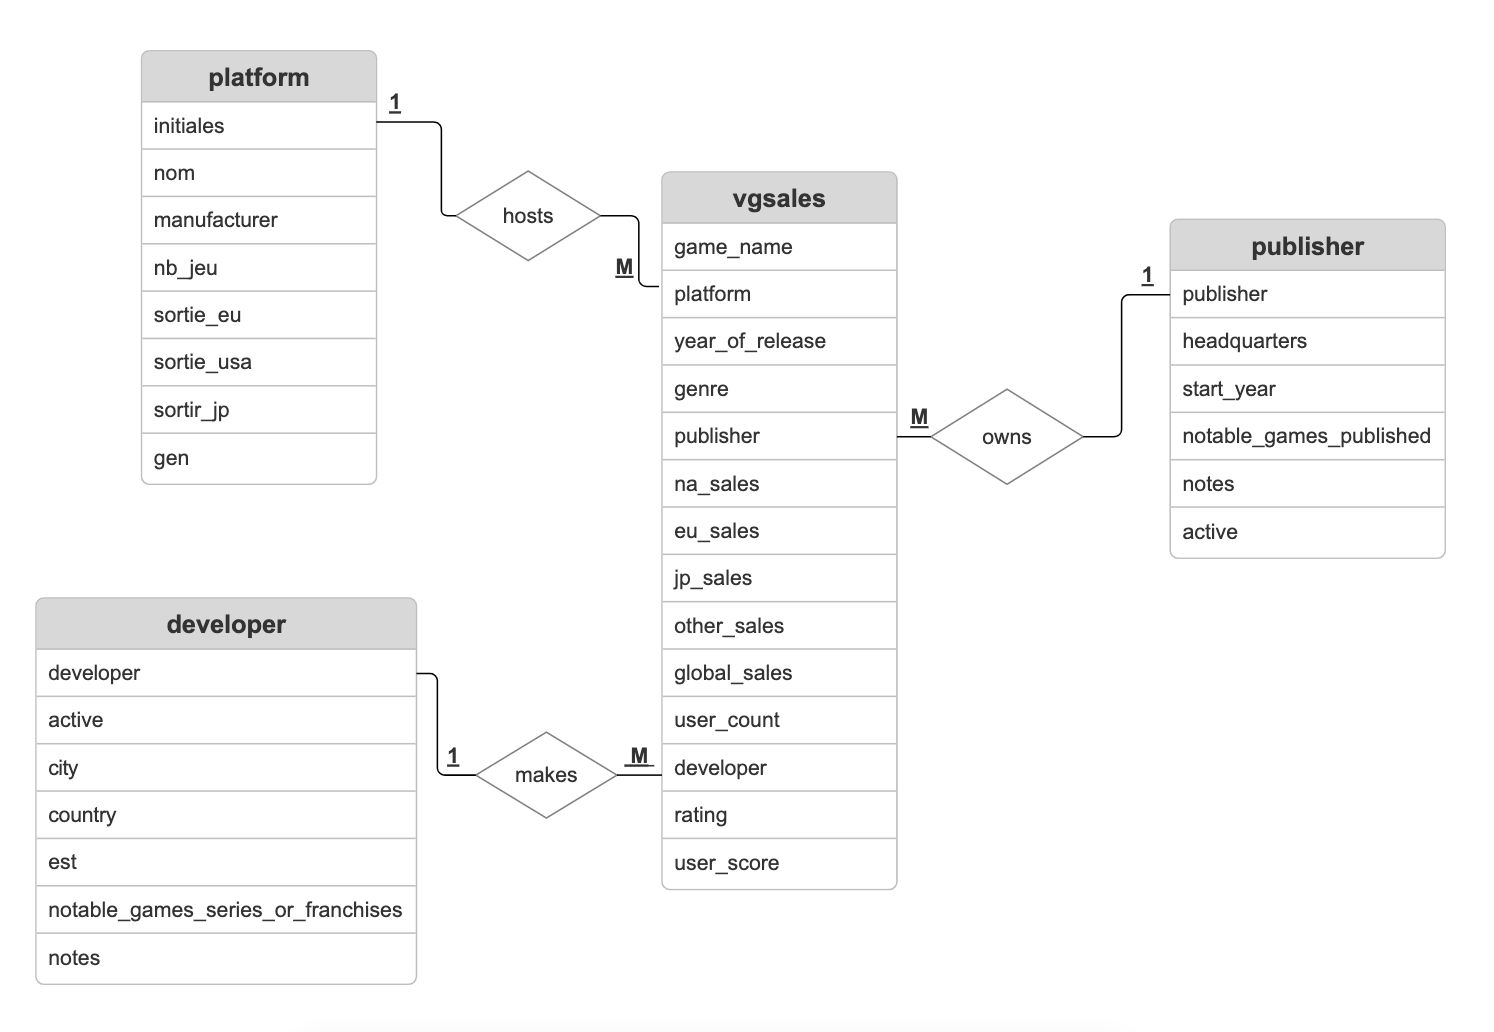

The ERD shows the four tables in our dataset.

**'Vgsales'** is our main table which contains information about the games and their respective sales. Each game has a **developer**, so we have used that column to join **vgsales** to the **developer** table. As a single developer can make multiple games, but a game can only be made by a single deveoper, there is a **1 to M** relationship.

Each game is hosted on a **platform**, so we have used this column to join **vgsales** to the **platform** column. A platform can host many games, so this is represented by the **1 to M** relationship between the tables.

Games are published by a **publisher**, so we used the **publisher** column in **vgsales** to join the table to the **publisher** table. One **publisher** owns many games, which is also a one to many relationship with **vgsales**.

Vgsales has 14 columns, developer has 7, platform has 8 and publisher has 6.


---
### Column Descriptions
### The vgsales.csv dataset contains the following columns:
| Columns (vgsales)    | Description |
| ----------- | ----------- |
|name| The name of the game|
|platform|The platform on which the game is available|
|year_of_release| The year when the game was released|       
|genre| The genre of the game|
|publisher| The publisher of the game|
|na_sales| Sales in North America (in millions)|
|eu_sales| Sales in Europe (in millions)|
|jp_sales| Sales in Japan (in millions)|           
|other_sales| Sales in other regions (in millions)|
|global_sales| Total worldwide sales (in millions)|         
|critic_score| The score given by critics|
|critic_count| The number of critics who reviewed the game|
|user_count| The number of users who reviewed the game|   
|developer|The developer of the game|
|rating| The ESRB rating of the game|  

---
### The developper.csv dataset contains the following columns:
| Columns (developer)| Description |
| ----------- | ----------- |
|developer| The name of the game developer.    
|active | Indicates whether the developer is currently active (1 for active, 0 for inactive).    
|city| The city where the developer is based.    
|autonomous_area| The autonomous area, if applicable, where the developer is located.    
|country| The country where the developer is based.    
|est|The year when the developer was established.    
|notable_games_series_or_franchises| Notable games series or franchises developed by the developer.    
|notes| Additional notes about the developer.    

---
### The plateform.csv dataset contains the following columns:
| Columns (platform)    | Description |
| ----------- | ----------- |
|initiales| The initials or abbreviation of the gaming platform.    
|nom| The full name of the gaming platform.    
|manufactureur| The manufacturer of the platform.    
|nb_jeu| The number of games available on the platform.    
|sortie_eu| Release date in Europe.    
|sortie_usa| Release date in the USA.    
|sortir_jp| Release date in Japan.    
|gen| The generation of the gaming console or platform.    

---
### The publisher.csv dataset contains the following columns:
| Columns (publisher)    | Description |
| ----------- | ----------- |
|publisher| The name of the game publisher.    
|headquarters| The location of the publisher's headquarters.   
|est| The year when the publisher was established.    
|notable_games_published| Notable games that the publisher has published.    
|notes| Additional notes about the publisher.    
|active| Indicates whether the publisher is currently active (1 for active, 0 for inactive).    

In [ ]:
# Install the BigQuery client library
!pip install --upgrade google-cloud-bigquery

# Authenticate the user
from google.colab import auth
auth.authenticate_user()

# Load the BigQuery magic commands
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


## Data Cleaning


#### Publisher Data Cleaning

In [ ]:
%%bigquery --project=ba775-b07
CREATE TABLE ba775-b07.ba775_07_datasets.publisher_joined AS
SELECT
    vgsales.name AS game_name,
    vgsales.platform,
    vgsales.year_of_release,
    vgsales.genre,
    vgsales.publisher,
    vgsales.na_sales,
    vgsales.eu_sales,
    vgsales.jp_sales,
    vgsales.other_sales,
    vgsales.global_sales,
    vgsales.critic_score,
    vgsales.critic_count,
    vgsales.user_score,
    vgsales.user_count,
    vgsales.developer,
    vgsales.rating,
    publisher.publisher AS publisher_1,
    publisher.headquarters,
    publisher.start_year,
    publisher.notable_games_published,
    publisher.notes,
    publisher.active
FROM
    ba775-b07.ba775_07_datasets.vgsales AS vgsales
JOIN
    ba775-b07.ba775_07_datasets.publisher AS publisher
ON
    vgsales.publisher = publisher.publisher;


Query is running:   0%|          |

""


Identifying the total null values in each column

In [ ]:
%%bigquery --project=ba775-b07
SELECT
  COUNTIF(game_name IS NULL) AS null_game_name,
  COUNTIF(platform IS NULL) AS null_platform,
  COUNTIF(year_of_release IS NULL) AS null_year_of_release,
  COUNTIF(genre IS NULL) AS null_genre,
  COUNTIF(publisher IS NULL) AS null_publisher,
  COUNTIF(na_sales IS NULL) AS null_na_sales,
  COUNTIF(eu_sales IS NULL) AS null_eu_sales,
  COUNTIF(jp_sales IS NULL) AS null_jp_sales,
  COUNTIF(other_sales IS NULL) AS null_other_sales,
  COUNTIF(global_sales IS NULL) AS null_global_sales,
  COUNTIF(user_count IS NULL) AS null_user_count,
  COUNTIF(developer IS NULL) AS null_developer,
  COUNTIF(rating IS NULL) AS null_rating,
  COUNTIF(publisher_1 IS NULL) AS null_publisher_1,
  COUNTIF(headquarters IS NULL) AS null_headquarters,
  COUNTIF(start_year IS NULL) AS null_start_year,
  COUNTIF(notable_games_published IS NULL) AS null_notable_games_published,
  COUNTIF(notes IS NULL) AS null_notes,
  COUNTIF(active IS NULL) AS null_active
FROM
  `ba775-b07.ba775_07_datasets.publisher_joined`;


Query is running:   0%|          |

Downloading:   0%|          |

,null_game_name,null_platform,null_year_of_release,null_genre,null_publisher,null_na_sales,null_eu_sales,null_jp_sales,null_other_sales,null_global_sales,null_user_count,null_developer,null_rating,null_publisher_1,null_headquarters,null_start_year,null_notable_games_published,null_notes,null_active
0,2,0,87,2,0,0,0,0,0,0,4876,3321,3385,0,0,0,1663,919,0


In [ ]:
%%bigquery --project=ba775-b07
ALTER TABLE ba775-b07.ba775_07_datasets.publisher_joined
DROP COLUMN user_count,
DROP COLUMN developer,
DROP COLUMN rating,
DROP COLUMN publisher_1;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
SELECT DISTINCT notable_games_published ,publisher
FROM `ba775-b07.ba775_07_datasets.publisher_joined`
WHERE notable_games_published IS NULL;

Query is running:   0%|          |

Downloading:   0%|          |

,notable_games_published,publisher
0,None,Agetec
1,None,Coleco
2,None,Jaleco
3,None,Compile
4,None,Mastiff
5,None,Quintet
6,None,Success
7,None,XS Games
8,None,505 Games
9,None,Banpresto


In [ ]:
%%bigquery --project=ba775-b07
UPDATE ba775-b07.ba775_07_datasets.publisher_joined
SET notable_games_published =
    CASE
        WHEN publisher = 'Mindscape' THEN 'Prince of Persia (1989)'
        WHEN publisher = 'Jaleco' THEN 'Bases Loaded (1987)'
        WHEN publisher = 'Success' THEN 'Metal Saga (2005)'
        WHEN publisher = 'AQ Interactive' THEN 'Blue Dragon (2006)'
        WHEN publisher = 'Ghostlight' THEN 'Shin Megami Tensei: Persona 3 Portable (2010)'
        WHEN publisher = 'Destineer' THEN 'Close Combat: A Bridge Too Far (1997)'
        WHEN publisher = 'Zushi Games' THEN 'Jumanji: The Video Game (2019)'
        WHEN publisher = 'Conspiracy Entertainment' THEN 'Gex: Enter the Gecko (1998)'
        WHEN publisher = 'O3 Entertainment' THEN 'Chaos Field (2004)'
        WHEN publisher = 'Mastiff' THEN 'Gurumin: A Monstrous Adventure (2004)'
        WHEN publisher = 'Gamecock' THEN 'Dementium: The Ward (2007)'
        WHEN publisher = 'Legacy Interactive' THEN 'Law & Order: Dead on the Money (2002)'
        WHEN publisher = 'Paradox Interactive' THEN 'Crusader Kings II (2012)'
        WHEN publisher = 'Devolver Digital' THEN 'Hotline Miami (2012)'
        WHEN publisher = 'Bigben Interactive' THEN 'Sherlock Holmes: Crimes & Punishments (2014)'
        WHEN publisher = 'TopWare Interactive' THEN 'Two Worlds II (2010)'
        WHEN publisher = 'inXile Entertainment' THEN 'Wasteland 2 (2014)'
        WHEN publisher = 'Activision Blizzard' THEN 'World of Warcraft (2004)'
        WHEN publisher = 'Compile' THEN 'Puyo Puyo (1991)'
        WHEN publisher = 'XS Games' THEN 'Arcade Zone (2009)'
        WHEN publisher = 'Agetec' THEN 'Armored Core (1997)'
        WHEN publisher = 'Panther Software' THEN 'Panther (1986)'
        WHEN publisher = 'General Entertainment' THEN 'Bomberman (1983)'
        WHEN publisher = 'U.S. Gold' THEN 'Summer Games (1984)'
        WHEN publisher = 'Vic Tokai' THEN 'Kid Kool (1990)'
        WHEN publisher = 'The Learning Company' THEN 'Reader Rabbit series (1986-present)'
        WHEN publisher = 'Xicat Interactive' THEN 'Moto Racer (1997)'
        WHEN publisher = 'Telltale Games' THEN 'The Walking Dead: Season One (2012)'
        WHEN publisher = 'Tradewest' THEN 'Double Dragon (1987)'
        WHEN publisher = 'Data East' THEN 'Bad Dudes vs. DragonNinja (1988)'
        WHEN publisher = 'Quintet' THEN 'ActRaiser (1990)'
        WHEN publisher = 'Coleco' THEN 'Donkey Kong (1981)'
        WHEN publisher = '505 Games' THEN 'Control (2019)'
        WHEN publisher = 'Banpresto' THEN 'Super Robot Taisen OG Saga: Endless Frontier (2008)'
        WHEN publisher = 'Infogrames' THEN 'Alone in the Dark (1992)'
        WHEN publisher = 'Vivendi Games' THEN 'World of Warcraft: The Burning Crusade (2007)'
        WHEN publisher = 'Rising Star Games' THEN 'Harvest Moon: Tree of Tranquility (2008)'
        WHEN publisher = 'Crave Entertainment' THEN 'Ultimate Fighting Championship (UFC) series (2000-2003)'
        WHEN publisher = 'Take-Two Interactive' THEN 'Grand Theft Auto V (2013)'
        WHEN publisher = 'Ignition Entertainment' THEN 'Muramasa: The Demon Blade (2009)'
        WHEN publisher = 'Disney Interactive Studios' THEN 'Kingdom Hearts series (2002-present)'
    END
WHERE notable_games_published IS NULL;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
ALTER TABLE ba775-b07.ba775_07_datasets.publisher_joined
DROP COLUMN notes;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
DELETE FROM ba775-b07.ba775_07_datasets.publisher_joined
WHERE
  game_name IS NULL OR
  platform IS NULL OR
  year_of_release IS NULL OR
  genre IS NULL OR
  publisher IS NULL OR
  na_sales IS NULL OR
  eu_sales IS NULL OR
  jp_sales IS NULL OR
  other_sales IS NULL OR
  global_sales IS NULL OR
  headquarters IS NULL OR
  start_year IS NULL OR
  notable_games_published IS NULL OR
  active IS NULL;

Query is running:   0%|          |

""


#### Publisher data cleaning - table joined

In [ ]:
%%bigquery --project=ba775-b07
CREATE TABLE ba775-b07.ba775_07_datasets.joined_with_platform AS
SELECT
    vg.*,
    p.initiales,
    p.nom,
    p.manufactureur,
    p.nb_jeu,
    p.sortie_eu,
    p.sortie_usa,
    p.sortir_jp,
    p.gen
FROM
    `ba775-b07.ba775_07_datasets.vgsales` AS vg
JOIN
    `ba775-b07.ba775_07_datasets.platform` AS p
ON
    vg.platform = p.initiales;

#### Developer Data Cleaning - table joined

In [ ]:
%%bigquery --project=ba775-b07
CREATE TABLE ba775-b07.ba775_07_datasets.joined_with_developer AS
SELECT
    vg.*,
    dev.city,
    dev.country,
    dev.est,
    dev.notable_games_series_or_franchises,
    dev.notes,
    dev.active
FROM
    `ba775-b07.ba775_07_datasets.vgsales` AS vg
JOIN
    `ba775-b07.ba775_07_datasets.developper` AS dev
ON
    vg.developer = dev.developer;


Query is running:   0%|          |

""


#### Dropping Columns
As part of our exploration, we realized that the following columns commprised majorly of null values and would thus, not productively contribute towards our analysis. As such, we decided to drop them.
1. **user_score**
2. **critic_count**
3. **autonomous_area**

In [ ]:
%%bigquery --project=ba775-b07
ALTER TABLE ba775-b07.ba775_07_datasets.vgsales
DROP COLUMN critic_count;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
ALTER TABLE `ba775-b07.ba775_07_datasets.vgsales`
DROP COLUMN user_score

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
ALTER TABLE ba775-b07.ba775_07_datasets.developper
DROP COLUMN autonomous_area;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
DELETE FROM ba775-b07.ba775_07_datasets.vgsales
WHERE genre IS NULL;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
DELETE FROM ba775-b07.ba775_07_datasets.vgsales
WHERE year_of_release IS NULL;

Query is running:   0%|          |

""


## Analysis

### Developer Influence on Game Sales

#### Q1. How do the geographic location and establishment year of game developers influence game sales?

Count of Developers

In [ ]:
%%bigquery --project=ba775-b07
SELECT
  country,
  count(*) as CountDevs
FROM
  `ba775-b07.ba775_07_datasets.developper`
GROUP BY
  country
ORDER BY
  CountDevs desc

Query is running:   0%|          |

Downloading:   0%|          |

,country,CountDevs
0,US,222
1,Japan,140
2,England,69
3,France,21
4,Canada,20
5,Germany,19
6,Sweden,17
7,South Korea,14
8,Poland,12
9,Australia,12


Count of Developers Established Each Year

In [ ]:
%%bigquery --project=ba775-b07
SELECT
  est,
  count(*) as CountYears
FROM
  ba775-b07.ba775_07_datasets.developper
GROUP BY
  est
ORDER BY
  CountYears desc

Query is running:   0%|          |

Downloading:   0%|          |

,est,CountYears
0,2000,41
1,2002,34
2,1997,33
3,1999,32
4,2001,31
5,2006,29
6,1996,29
7,1998,29
8,2005,27
9,1995,27


We can see that the most developers in the dataset are from the US (222), followed by Japan (140), England (69), France (21) and Canada (20).

Most development companies appear to have been established in the year 2000, or the years directly preceeding or succeeding that. This period is also popularly referred to as the "Sixth Generation" of videogames. It was the era of high-definition video games, with the creation of the Dreamcast, Sony's PlayStation 2, Microsoft's Xbox and Nintendo's GameCube. With this information, it thus makes sense why many developers, inspired by the popularity and success of these big names, began to emerge, as there were now also multiple different types of platforms on which videogames could be played.

*References:* https://apps.lib.umich.edu/online-exhibits/exhibits/show/cvga-disassembled/gamegen6

This is reflected in the heatmap below, where we can see that the US is the darkest region - representing the highest count of developers. Japan is the region near South Korea, and is also a darker region, and England and France are also shaded darkly, representing a high count of developers.

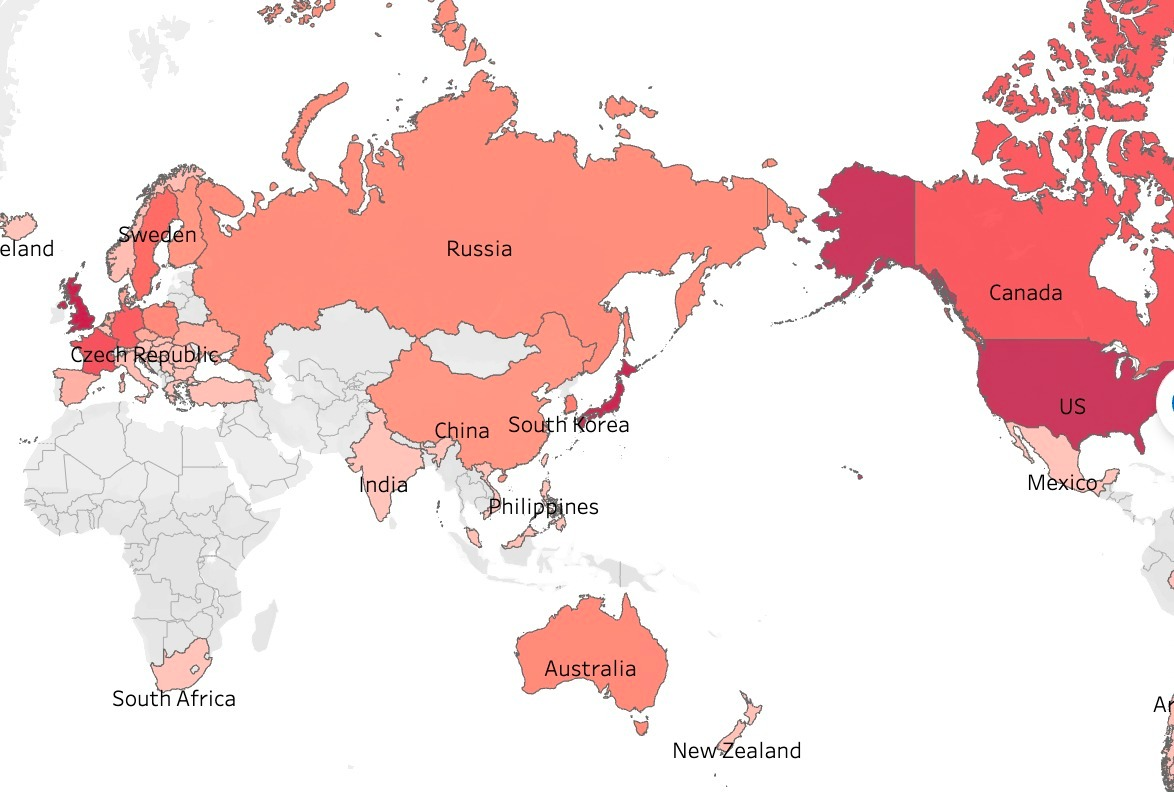

#### Q2.Which geographic regions are home to the most successful game developers in terms of sales?

Developers with the Highest Sales and their Geographic Location

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    d.developer,
    d.country,
    SUM(g.global_sales) AS total_global_sales
FROM
    ba775-b07.ba775_07_datasets.vgsales g
JOIN
    ba775-b07.ba775_07_datasets.developper d ON g.developer = d.developer
GROUP BY
    d.developer, d.country
ORDER BY
    total_global_sales DESC
LIMIT 3;


Query is running:   0%|          |

Downloading:   0%|          |

,developer,country,total_global_sales
0,Nintendo,Japan,531.71
1,Ubisoft,France,132.25
2,Capcom,Japan,115.34


Cumulative Global Sales by Country

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    d.country,
    SUM(g.global_sales) AS cumulative_global_sales
FROM
    `ba775-b07.ba775_07_datasets.vgsales` g
JOIN
    `ba775-b07.ba775_07_datasets.developper` d ON g.developer = d.developer
GROUP BY
    d.country
ORDER BY
    cumulative_global_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,country,cumulative_global_sales
0,Japan,1174.40
1,US,1088.54
2,England,234.27
3,France,154.70
4,Canada,97.61
5,Australia,24.83
6,Sweden,23.40
7,"Japan,US",15.55
8,Romania,13.91
9,Poland,13.40


If we look at the 3 developers that had the most global sales across all of their games, Japanese developers appear to be dominating the list, showing the strong presence and success of Japanese game development comapnies in the global market. Ubisoft in France also demonstrates significant global success.

Looking at the cumulative global sales by developer country provides us with a broader perspective on the distribution of success across different regions. Japan again dominates the global games landscape, followed closely by the US. England, France and Canada follow next, but all have a significant difference with Japan and the US. Based on our dataset, there is almost a $860 million difference between the countries with the second (US) and third (England) highest cumulative sales!

#### Q3. Which developers have the most number of games in the dataset? Do developers tend to stick to creating games with the same genres, or do they diversify?

Developers with the Most Number of Games

In [ ]:
%%bigquery --project=ba775-b07
# distribution of developers with the most game
SELECT
  v.developer, d.notable_games_series_or_franchises as notable_games, d.country, count(*) as game_count
FROM
  ba775-b07.ba775_07_datasets.vgsales v
INNER JOIN ba775-b07.ba775_07_datasets.developper d
  ON v.developer = d.developer
WHERE
  v.developer is not NULL
GROUP BY
  v.developer, notable_games, country
ORDER BY
  game_count desc
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,developer,notable_games,country,game_count
0,Ubisoft,Rayman seriesAssassin's Creed seriesJust Dance...,France,201
1,Konami,Gradius seriesContra seriesMetal Gear seriesCa...,Japan,158
2,Capcom,Mega Man franchise Mega Man series Mega Man X ...,Japan,137
3,Electronic Arts,FIFA seriesNeed For Speed seriesPlants vs. Zom...,US,101
4,Visual Concepts,NFL 2KNBA 2K seriesMLB 2K series,US,98
5,Omega Force,Warriors franchise Dynasty Warriors series Dyn...,Japan,80
6,Activision,Call of Duty seriesCrash Bandicoot seriesSpyro...,US,75
7,Vicarious Visions,Guitar Hero seriesTony Hawk seriesCrash Bandic...,US,74
8,Nintendo,Super Mario franchiseThe Legend of Zelda franc...,Japan,72
9,THQ,None,US,71


Diversity of Developers' Game Library Type

In [ ]:
%%bigquery --project=ba775-b07
# developers who make games for different genres
SELECT
    developer,
    COUNT(DISTINCT genre) AS unique_genre_count
FROM
    ba775-b07.ba775_07_datasets.vgsales
WHERE
    developer is not null
GROUP BY
    developer
ORDER BY unique_genre_count desc

Query is running:   0%|          |

Downloading:   0%|          |

,developer,unique_genre_count
0,Capcom,12
1,Konami,12
2,Namco,11
3,Ubisoft,11
4,THQ,10
...,...,...
1675,"Phosphor Games Studio, LLC",1
1676,"Rocksteady Studios, Virtuos",1
1677,Warner Bros. Interactive Entertainment,1
1678,"Rocksteady Studios, Iron Galaxy Studios",1


We can see that out of the top 10 developers with the most games in the dataset, Ubisoft is dominating with 201 games, followed by Konami, Capcon and Electronic Arts (EA). This makes sense, given that these developers boast a large variety of games, ranging from Assasain's Creed and Prince of Persia, to Megaman and FIFA. Nintendo just manages to crack the top 10, with 72 different games on record in the dataset.

Another interesting element of this analysis is that out of the developers with the most games in the dataset, 5 are from the US, 4 are from Japan and 1 is based in France. We have already seen above that Japanese and American developers are dominating global game sales, so game library size could be a contributing factor.

We can see that 2 developers - Capcom and Konami - have at least 1 game belonging to each genre! And as we go through the list, we can see that a lot of developers have created games belonging to different genres, which could suggest that it is important for organizations to diversify and innovation across different streams because of competition, rather than sticking to one or two genres which they might have started off with.

####Q4. Is there a correlation between a developer's establishment year and the success of their games on Steam?

In [ ]:
%%bigquery --project=ba775-b07
SELECT *
FROM ba775-b07.ba775_07_datasets.developper
inner join ba775-b07.ba775_07_datasets.vgsales
USING (developer)

Query is running:   0%|          |

Downloading:   0%|          |

,developer,active,city,country,est,notable_games_series_or_franchises,notes,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_count,rating
0,Virtuos,1,None,Singapore,2004,Monster Jam: Path of DestructionGhost Recon Pr...,None,Beowulf: The Game,PSP,2007,Action,Ubisoft,0.08,0.00,0.0,0.01,0.09,44,7,M
1,Virtuos,1,None,Singapore,2004,Monster Jam: Path of DestructionGhost Recon Pr...,None,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0.0,0.02,0.10,54,<NA>,T
2,Virtuos,1,None,Singapore,2004,Monster Jam: Path of DestructionGhost Recon Pr...,None,Asphalt: Urban GT 2,DS,2006,Racing,Ubisoft,0.09,0.04,0.0,0.01,0.14,<NA>,13,E10+
3,Virtuos,1,None,Singapore,2004,Monster Jam: Path of DestructionGhost Recon Pr...,None,Monster Jam: Path of Destruction,DS,2010,Racing,Activision,0.34,0.00,0.0,0.03,0.37,<NA>,<NA>,E
4,Virtuos,1,None,Singapore,2004,Monster Jam: Path of DestructionGhost Recon Pr...,None,DreamWorks Super Star Kartz,DS,2011,Racing,Activision,0.08,0.03,0.0,0.01,0.13,<NA>,<NA>,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,Bohemia Interactive,1,Prague,Czech Republic,1999,Operation Flashpoint: Cold War CrisisArma seri...,None,ArmA II,PC,2009,Shooter,505 Games,0.00,0.12,0.0,0.02,0.14,77,589,M
3782,Bohemia Interactive,1,Prague,Czech Republic,1999,Operation Flashpoint: Cold War CrisisArma seri...,None,Operation Flashpoint: Elite,XB,2005,Shooter,Codemasters,0.03,0.01,0.0,0.00,0.04,64,27,T
3783,Bohemia Interactive,1,Prague,Czech Republic,1999,Operation Flashpoint: Cold War CrisisArma seri...,None,ArmA III,PC,2013,Shooter,Bohemia Interactive,0.00,0.10,0.0,0.01,0.11,74,866,M
3784,SCS Software,1,Prague,Czech Republic,1997,18 Wheels of Steel seriesEuro Truck Simulator ...,None,Euro Truck Simulator,PC,2008,Simulation,Rondomedia,0.00,0.42,0.0,0.07,0.49,<NA>,35,None


Relationship between establishment year and game success

In [ ]:
%%bigquery --project=ba775-b07

SELECT developer, est, round(sum(global_sales),2) as total_global_sales
from ba775-b07.ba775_07_datasets.joined_with_developer
group by developer, est
ORDER BY sum(global_sales) DESC

Query is running:   0%|          |

Downloading:   0%|          |

,developer,est,total_global_sales
0,Nintendo,1889,531.71
1,Ubisoft,1986,132.25
2,Capcom,1979,115.34
3,Treyarch,1996,101.53
4,Infinity Ward,2002,77.62
...,...,...,...
292,Strawdog Studios,2003,0.02
293,Flagship Studios,2003,0.02
294,Cryptic Studios,2000,0.02
295,Compulsion Games,2009,0.01


The success of game developers on platforms like Steam is influenced by various factors, and the establishment year alone does not appear to determine their achievements.

For example, Nintendo with an establishment year of 1889, boasts a substantial total global sales figure of 531.71. Nintendo also appears to be the only developer in the dataset that was established before the 1950s, as it was initially established as a company to make and distribute handmade playing cards.

Meanwhile, Ubisoft, established in 1986, follows with a total global sales figure of 132.25. Capcom, founded in 1979, has a total global sales figure of 115.34, while Treyarch, established in 1996, holds a total global sales figure of 101.53.

While Nintendo has the highest sales by far, there doesn't appear to be a consistent pattern with older developers achieving higher sales.



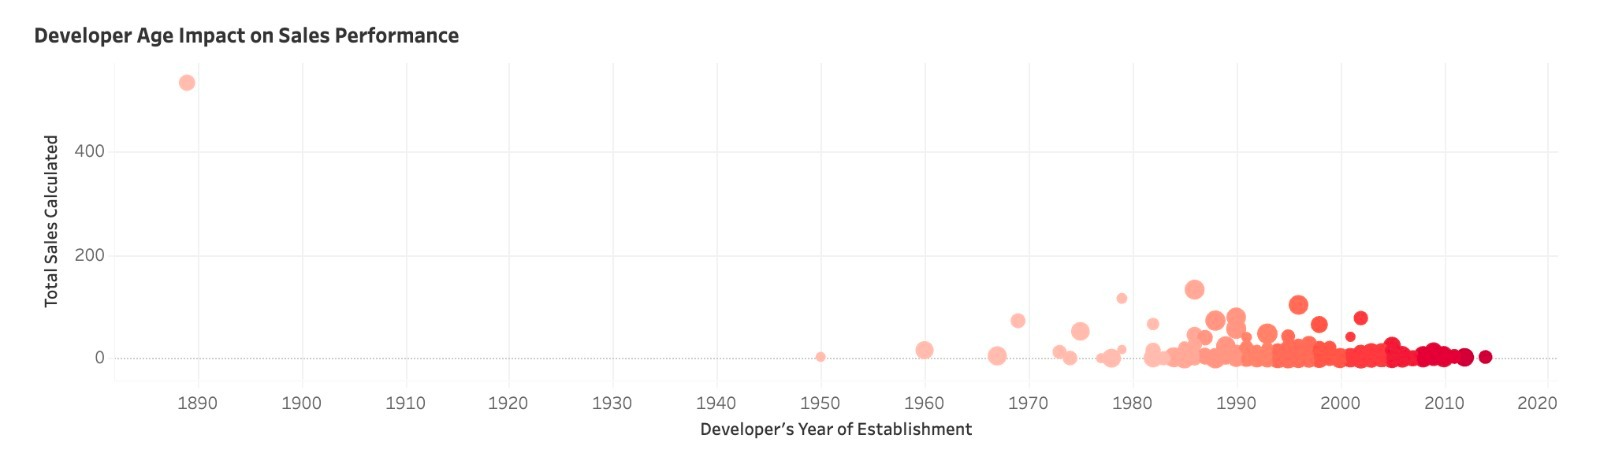

####Q5. Is there any relationship between developers and the publishers they choose to work with? Or does a single game development company always create games for a single publisher?

In [ ]:
%%bigquery --project=ba775-b07
# Relation between developers and publishers

SELECT developer, count(distinct publisher) as count_publisher
from ba775-b07.ba775_07_datasets.joined_with_developer
group by developer
ORDER BY count_publisher DESC


Query is running:   0%|          |

Downloading:   0%|          |

,developer,count_publisher
0,High Voltage Software,18
1,Griptonite Games,13
2,Digital Eclipse,12
3,Terminal Reality,11
4,Krome Studios,10
...,...,...
292,Nicalis,1
293,Ghost Games,1
294,TopWare Interactive,1
295,Foundation 9 Entertainment,1


High Voltage Software leads the list with a notable count of 18 publishers, indicating a broad network of partnerships and collaborations. Griptonite Games follows closely with 13 publishers, highlighting their engagement with various entities in the industry. Digital Eclipse secures the third position with a count of 12 publishers, showcasing their involvement in a diverse range of projects. Terminal Reality rounds out the top four with 11 publishers, underscoring their engagement with a substantial number of publishing partners. 105 of the developers only work with 1 publisher, and 193 work with at least 2 publishers. Nintendo which comes on top in every region only works with 1 publisher. Ubisoft which is second in terms of cumulative global sales has 4 different publishers. Having more publishers does not mean that the company performs better.

####Q6. How many different platforms do developers make games for?

In [ ]:
%%bigquery --project=ba775-b07
# How many platforms per developer

SELECT developer, count(distinct platform) as count_platforms
from ba775-b07.ba775_07_datasets.joined_with_developer
group by developer
ORDER BY count_platforms DESC

Query is running:   0%|          |

Downloading:   0%|          |

,developer,count_platforms
0,Capcom,17
1,Ubisoft,15
2,Traveller's Tales,15
3,Konami,14
4,Vicarious Visions,14
...,...,...
292,Iron Lore Entertainment,1
293,Stainless Steel Studios,1
294,Nicalis,1
295,Foundation 9 Entertainment,1


In addition to understanding the financial success of these developers, it's also important to consider the diversity of platforms they have contributed to. For instance, Nintendo, with its impressive total global sales of 531.71, is known for spanning various platforms, including consoles like the Nintendo Switch. Ubisoft, Capcom, Treyarch, and Traveller's Tales, with their notable total sales figures, may also have diverse platform portfolios, reflecting their efforts to engage with a broad spectrum of gamers across different gaming systems.

####Q7. Deep-diving into the average global sales growth for each developer.

In [ ]:
%%bigquery --project=ba775-b07
WITH SalesGrowth AS (
    SELECT
        developer,
        year_of_release,
        LAG(SUM(global_sales)) OVER (PARTITION BY developer ORDER BY year_of_release) AS prev_year_sales,
        SUM(global_sales) AS current_year_sales
    FROM
        ba775-b07.ba775_07_datasets.vgsales
    GROUP BY
        developer, year_of_release
)
SELECT
    developer,
    AVG((current_year_sales - prev_year_sales) / prev_year_sales) AS avg_growth_rate
FROM
    SalesGrowth
WHERE
    prev_year_sales IS NOT NULL
GROUP BY
    developer
ORDER BY
    avg_growth_rate DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,developer,avg_growth_rate
0,Obsidian Entertainment,183.164041
1,Irrational Games,141.666667
2,Splash Damage,96.000000
3,Massive Entertainment,79.125000
4,Black Isle Studios,46.166667
...,...,...
824,Delphine Software International,-0.984848
825,The Code Monkeys,-0.986842
826,SCi,-0.988506
827,Eugen Systems,-0.990385


The table above reflects the average year-on-year growth for the developers in our dataset. We can see the vast difference in the developers with the highest and lowest average year on year growth in terms of release year sales. While Obsidian Entertainment appears to be a higher performer, achieving a staggering $183M in sales growth across release years on average, we can see that companies like Delphine Software International appeared to achieve fewer sales across release years, which is interesting because this company eventually shut down its operations.

####Q8. Distribution of average critic score for the 10 developers that are based in the top 5 countries on the basis of sales.

In [ ]:
%%bigquery --project=ba775-b07
WITH Top5Countries AS (
    SELECT Country, SUM(global_sales) AS TotalSales
    FROM ba775-b07.ba775_07_datasets.t4
    GROUP BY Country
    ORDER BY TotalSales DESC
    LIMIT 5
)

SELECT
    Developer,
    avg(critic_score) AS AverageUserScore
FROM ba775-b07.ba775_07_datasets.t4
WHERE
    Country IN (SELECT Country FROM Top5Countries)
GROUP BY Developer
HAVING
    Developer IS NOT NULL
    AND AVG(critic_score)IS NOT NULL
    Order By AverageUserScore Desc
    Limit 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Developer,AverageUserScore
0,Irrational Games,91.500000
1,Bethesda Game Studios,90.555556
2,Retro Studios,90.000000
3,Blizzard Entertainment,89.200000
4,Naughty Dog,89.200000
5,Certain Affinity,89.000000
6,Playground Games,88.500000
7,Bungie,88.500000
8,Polyphony Digital,88.285714
9,BioWare,88.045455


This shows the average user scores for a selection of developers based on the criterion of being located in the top 5 countries with the highest global sales. Within this context, developers such as "Irrational Games," "Bethesda Game Studios," "Retro Studios," and others have achieved notable acclaim, reflecting positive user reception. The competitive landscape among top developers, as evidenced by closely matched scores for "Certain Affinity," "Playground Games," "Bungie," and "Polyphony Digital," underscores the consistent satisfaction of users across this subset. The inclusion of only developers based in the top 5 countries with the most sales ensures a focused analysis, shedding light on the user sentiment within key markets. The slightly lower score for "BioWare" invites consideration of factors contributing to this distinction.

### Impact of Platforms

####Q9. How do sales figures vary across different gaming platforms available on Steam?

In [ ]:
%%bigquery --project=ba775-b07
SELECT p.initiales, SUM(v.global_sales) AS total_sales, (SUM(global_sales) / (SELECT SUM(global_sales) FROM `ba775-b07.ba775_07_datasets.vgsales`) * 100) AS Percentage_Of_Total_Sales
FROM `ba775-b07.ba775_07_datasets.platform` p
JOIN `ba775-b07.ba775_07_datasets.vgsales` v ON p.initiales = v.platform
GROUP BY p.initiales
ORDER BY total_sales DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,initiales,total_sales,Percentage_Of_Total_Sales
0,PS2,1233.46,13.986520
1,X360,961.39,10.901448
2,PS3,931.15,10.558549
3,Wii,891.74,10.111669
4,DS,803.73,9.113701
5,PS,727.41,8.248289
6,PS4,314.23,3.563135
7,GBA,313.56,3.555537
8,PSP,289.79,3.286003
9,3DS,257.92,2.924621


The best-selling gaming platforms include the PS2 (PlayStation 2) from Sony Computer Entertainment. Recognized as one of the highest-selling consoles ever, it generates significantly more sales than any other platform. Following the PS2 is the X360 (Xbox 360) from Microsoft it played a pivotal role in the gaming industry. The PS3 (PlayStation 3), also from Sony Computer Entertainment, entered the market as a competitor to the Xbox 360. Nintendo's Wii distinguished itself with the Wii Remote's motion-sensing capabilities. Nintendo's DS (Dual Screen), a handheld console, secured its position among the top-selling consoles. Featuring dual screens, with one being a touchscreen, the DS attracted buyers with its diverse game library, including popular franchises like Mario and Pokémon. The original PlayStation (PS) is another significant gaming platform developed and produced by Sony Computer Entertainment.

The is a huge sales gap between the top six platforms and the rest. The total percentage of sales of the top six platforms composed 63% of the total market.


####Q10. How many games are available on each gaming platform, and what is the correlation between the number of games and their respective sales?

In [ ]:
%%bigquery --project=ba775-b07
SELECT p.initiales, COUNT(year_of_release) AS total_number_games, (COUNT(year_of_release) / (SELECT COUNT(year_of_release) FROM `ba775-b07.ba775_07_datasets.vgsales`) * 100) AS Percentage_Of_Total_games
FROM `ba775-b07.ba775_07_datasets.platform` p
JOIN `ba775-b07.ba775_07_datasets.vgsales` v ON p.initiales = v.platform
GROUP BY p.initiales
ORDER BY total_number_games DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,initiales,total_number_games,Percentage_Of_Total_games
0,PS2,2127,12.931663
1,DS,2122,12.901265
2,PS3,1306,7.940175
3,Wii,1286,7.818580
4,X360,1232,7.490272
5,PSP,1193,7.253161
6,PS,1190,7.234922
7,PC,957,5.818337
8,GBA,811,4.930691
9,XB,803,4.882053


PlayStation 2 and Nintendo's Dual Screen have the most extensive game libraries, exceeding 2000 titles each, a notable distinction from other platforms. Among the top 10 platforms, the range spans from 2000 to 800 games. However, as we move beyond this tier, the number of games on a platform sharply decreases, often reaching 500 or fewer. It's worth highlighting that a discernible positive correlation exists between the number of games available on a platform and its sales. This suggests that platforms offering a more extensive selection of games tend to generate higher sales, underscoring the significance of a diverse and robust game library in driving overall platform success.


####Q11.  How do sales figures for different game genres vary across gaming platforms?

In [ ]:
%%bigquery --project=ba775-b07
SELECT p.initiales, v.genre, SUM(global_sales) AS total_sales,
FROM `ba775-b07.ba775_07_datasets.platform` p
JOIN `ba775-b07.ba775_07_datasets.vgsales` v ON p.initiales = v.platform
GROUP BY p.initiales, v.genre
ORDER BY total_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,initiales,genre,total_sales
0,PS3,Action,297.83
1,Wii,Sports,286.54
2,X360,Shooter,275.67
3,PS2,Action,272.43
4,PS2,Sports,262.64
...,...,...,...
288,PS4,Puzzle,0.03
289,TG16,Shooter,0.02
290,NG,Sports,0.02
291,3DO,Simulation,0.02


PlayStation 3 dominates the sales charts with its action genre games, leading across both individual platforms and overall sales. The Wii, on the other hand, stands out as a hub for sports and miscellaneous games, capturing significant popularity in these categories. Xbox 360 takes the lead in generating sales for shooter and action games, while PlayStation 2 emerges as a powerhouse in sports and action game sales. When examining the broader landscape, it becomes evident that action and sports games reign supreme in terms of popularity and sales across these prominent platforms and extend their dominance to other platforms as well. These genres consistently outperform others, highlighting their widespread appeal and the substantial revenue they generate in the gaming industry.


####Q12. Retrieve the top 10 platforms based on the number of games, and for each of these platforms, display the top 5 games along with their respective critic scores.

In [ ]:
%%bigquery --project=ba775-b07
WITH RankedGames AS (
    SELECT
        platform,
        name,
        critic_score,
        ROW_NUMBER() OVER (PARTITION BY platform ORDER BY critic_score DESC) AS rank
    FROM
        ba775-b07.ba775_07_datasets.joined_with_developer
    WHERE
        critic_score IS NOT NULL
)
SELECT
    platform,
    ARRAY_AGG(CONCAT(name, ' (', critic_score, ')')) AS top_games_with_scores
FROM
    RankedGames
WHERE
    rank <= 5
GROUP BY
    platform
ORDER BY
    COUNT(*) DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,platform,top_games_with_scores
0,GC,"[Metroid Prime (97), The Legend of Zelda: The ..."
1,PS2,"[Resident Evil 4 (96), Gran Turismo 3: A-Spec ..."
2,PS4,"[Uncharted 4: A Thief's End (93), Overwatch (9..."
3,PC,"[Mass Effect 2 (94), BioShock Infinite (94), T..."
4,XB,"[Ninja Gaiden Black (94), Star Wars: Knights o..."
5,X360,"[Mass Effect 2 (96), The Elder Scrolls V: Skyr..."
6,WiiU,"[Super Mario 3D World (93), Bayonetta 2 (91), ..."
7,XOne,"[Forza Horizon 3 (91), Overwatch (91), NBA 2K1..."
8,GBA,"[The Legend of Zelda: A Link to the Past (95),..."
9,Wii,"[Super Mario Galaxy (97), The Legend of Zelda:..."


From this analysis we can see the top 10 platforms ranked by game count and critic score. The following reveal PC leading with a consistent score of 94 across its top 5 games such as :'Mass Effect 2', 'BioShock Infinite', 'The Elder Scrolls V: Skyrim' ,'Diablo' and 'Sid Meier's Civilization IV'. WiiU secures second place, led by the game named Super Mario 3D World with a commendable score of 93.

####Q13. Analyzing Top 10 Global Sales Platforms by Genre: Genre-specific Sales Distribution Across Leading Platforms

In [ ]:
%%bigquery --project=ba775-b07
WITH PlatformSales AS (
  SELECT
    platform,SUM(global_sales) AS total_sales
  FROM`ba775-b07.ba775_07_datasets.vgsales`
  GROUP BY platform
  ORDER BY total_sales DESC
  LIMIT 10
)

SELECT s.genre,s.platform,SUM(s.global_sales) AS total_sales
FROM ba775-b07.ba775_07_datasets.vgsales s
JOIN PlatformSales p ON s.platform = p.platform
GROUP BY s.genre, s.platform
ORDER BY s.platform, total_sales DESC

Query is running:   0%|          |

Downloading:   0%|          |

,genre,platform,total_sales
0,Role-Playing,3DS,84.26
1,Action,3DS,57.93
2,Platform,3DS,32.52
3,Simulation,3DS,26.94
4,Racing,3DS,14.86
...,...,...,...
115,Adventure,X360,14.94
116,Simulation,X360,13.84
117,Platform,X360,11.32
118,Strategy,X360,9.68


The analysis on genre-specific sales distribution across top 10 platforms reveals distinctive preferences for game genres across various gaming platforms, likely reflecting each platform's market strategy and user demographic. The Xbox 360 leads overwhelmingly in Shooter games with a striking 105.4 million in sales, aligning with its user base that favors a high-intensity gaming experiences. This is also represented by a dark coloured block in our heatmap below. The Wii's family-friendly approach is evident with its dominance in the Misc and Sports categories, boasting 65.2 and 95.3 million in sales respectively, which complements its broader, more casual gaming audience. This is confirmed by the darker blocks in the heatmap. The PS3 shows a strong affinity for Action and Fighting genres, indicative of its diverse library that caters to both hardcore and casual gamers.

These trends offer insights into the alignment of platform-specific gaming libraries with consumer demand and highlight potential avenues for targeted genre development and marketing strategies within the gaming industry.

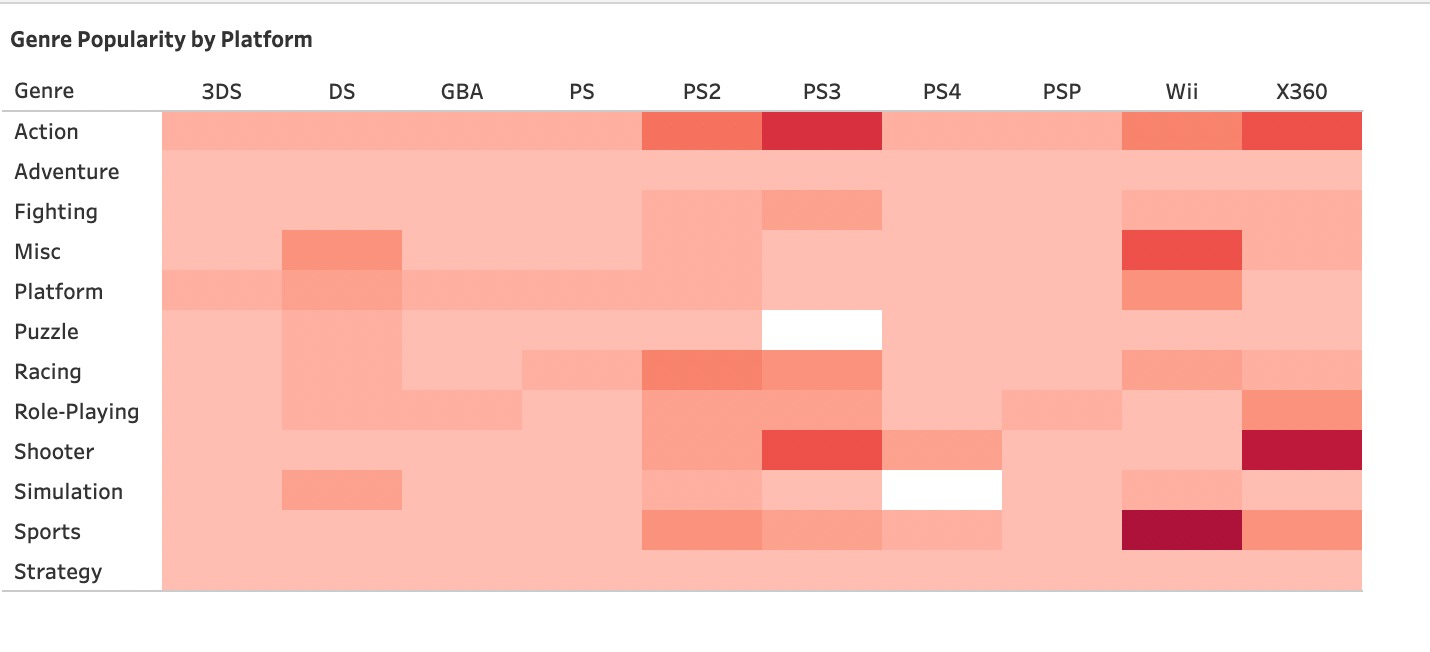

### Impact of Publishers on Game Sales


####Q14.  What is the correlation between publishers' cumulative sales on Steam and the age or notability of the publishers, reflecting on the success rates of their published games?

In [ ]:
%%bigquery --project=ba775-b07
SELECT
  publisher,
  EXTRACT(YEAR FROM CURRENT_DATE()) - start_year AS publisher_age,
  COUNT(DISTINCT game_name) AS num_games_published,
  SUM(global_sales) AS total_global_sales,
  SUM(global_sales) / COUNT(DISTINCT game_name) AS avg_sales_per_game
FROM
  ba775-b07.ba775_07_datasets.publisher_joined
GROUP BY
  publisher, publisher_age
ORDER BY
  total_global_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,publisher,publisher_age,num_games_published,total_global_sales,avg_sales_per_game
0,Nintendo,134,666,1786.72,2.682763
1,Electronic Arts,41,607,1100.05,1.812273
2,Activision,44,418,725.14,1.734785
3,Ubisoft,37,575,470.45,0.818174
4,Take-Two Interactive,30,204,403.58,1.978333
...,...,...,...,...,...
189,Epic Games,32,1,0.02,0.020000
190,Giga,30,1,0.02,0.020000
191,Quintet,36,1,0.02,0.020000
192,Lighthouse Interactive,18,1,0.01,0.010000


How publishers, with their age and notability, shape the sales of games, as we can observe patterns and trends, here are some insights and observations based on the data:

1. Nintendo:
   - Nintendo, with 666 games published, has the highest total global sales (1786.72).
   - It has been in the industry for a long time (134 years) and has a high average sales per game (2.68), indicating consistent success.

2. Electronic Arts (EA):
   - EA, with 607 games published, has a notable total global sales (1100.05).
   - Despite being in the industry for 41 years, EA has a slightly lower average sales per game (1.81) compared to Nintendo.

3. Activision:
   - Activision, with 418 games published, has a substantial total global sales (725.14).
   - It has been in the industry for 44 years and has a relatively high average sales per game (1.73).

4. Ubisoft:
   - Ubisoft, with 575 games published, has a total global sales of 470.45.
   - Despite being in the industry for 37 years, Ubisoft has a lower average sales per game (0.82), suggesting variability in game performance.

5. Take-Two Interactive:
   - Take-Two Interactive, with 204 games published, has a total global sales of 403.58.
   - Despite a lower number of games, it has a high average sales per game (1.98), indicating strong individual game performance.

6. Publisher Age and Notability:
   - Older publishers like Nintendo (134 years) and Capcom (44 years) have a considerable impact on total global sales.
   - Notable publishers with a significant number of games and high total sales include Nintendo, EA, Activision, and Ubisoft.

7. Variability:
   - Some publishers, like Bethesda Softworks, have a high average sales per game despite publishing fewer titles.
   - Others, like 505 Games and Codemasters, have a lower average sales per game despite publishing more titles.

8. Smaller Publishers:
   - Some smaller publishers, such as Mojang, Imagic, and UEP Systems, have high average sales per game, indicating notable success despite a smaller number of published titles.

In conclusion, the age and notability of publishers, along with factors like the number of games published and average sales per game, contribute to shaping the sales of games. Established publishers with a long history, a significant number of games, and high average sales tend to have a substantial impact on the industry. However, success can also be achieved by newer or smaller publishers with standout titles.

Correlation

In [ ]:
%%bigquery --project=ba775-b07
WITH PublisherStats AS (
  SELECT
    publisher,
    EXTRACT(YEAR FROM CURRENT_DATE()) - start_year AS publisher_age,
    COUNT(DISTINCT game_name) AS num_games_published,
    SUM(global_sales) AS total_global_sales,
    SUM(global_sales) / COUNT(DISTINCT game_name) AS avg_sales_per_game
  FROM
    `ba775-b07.ba775_07_datasets.publisher_joined`
  GROUP BY
    publisher, publisher_age
)

SELECT
  CORR(publisher_age, total_global_sales) AS age_sales_correlation,
  CORR(num_games_published, total_global_sales) AS games_sales_correlation,
  CORR(num_games_published, avg_sales_per_game) AS games_avg_sales_correlation
FROM
  PublisherStats;

Query is running:   0%|          |

Downloading:   0%|          |

,age_sales_correlation,games_sales_correlation,games_avg_sales_correlation
0,0.418786,0.869469,0.439608


Age vs. Total Global Sales (0.42):
The correlation coefficient between publisher age and total global sales is 0.42. This suggests a moderate positive correlation. However, it's important to note that correlation does not imply causation. The positive correlation indicates that, on average, older publishers tend to have higher total global sales, but other factors may also contribute to the success of games.

Number of Games Published vs. Total Global Sales (0.87):
The correlation coefficient between the number of games published and total global sales is high at 0.87. This strong positive correlation suggests that publishers who have published a larger number of games tend to achieve higher total global sales. This relationship may imply that experience or a larger portfolio positively influences sales.

Number of Games Published vs. Average Sales per Game (0.44):
The correlation coefficient between the number of games published and average sales per game is 0.44, indicating a moderate positive correlation. This suggests that publishers with a higher number of games published also tend to have slightly higher average sales per game. However, this relationship is not as strong as the correlation with total global sales.

####Q15.  How do publisher marketing strategies affect the sales performance of different game genres?

In [ ]:
%%bigquery --project=ba775-b07
WITH PublisherMarketingData AS (
  SELECT
    genre,
    publisher,
    AVG(global_sales) AS avg_sales
  FROM
    `ba775-b07.ba775_07_datasets.publisher_joined`
  GROUP BY
    genre, publisher
)

SELECT
  genre,
  publisher,
  AVG(avg_sales) AS avg_sales,
FROM
  PublisherMarketingData
GROUP BY
  genre, publisher
ORDER BY
  avg_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,publisher,avg_sales
0,Racing,Nintendo,4.089189
1,Sports,Nintendo,3.946182
2,Platform,Nintendo,3.828018
3,Simulation,Nintendo,3.040357
4,Role-Playing,Bethesda Softworks,2.961579
...,...,...,...
803,Simulation,Success,0.010000
804,Adventure,Nitroplus,0.010000
805,Racing,Mastertronic,0.010000
806,Adventure,Cave,0.010000


Let's consider the example of Nintendo. Nintendo's exemplary performance across various game genres can be attributed to a combination of diverse marketing strategies, a highly skilled development team, and a deep understanding of audience preferences. The company has consistently demonstrated its ability to create appealing and innovative games that cater to different player interests, solidifying its position as a powerhouse in the gaming industry.

### Regional Game Preferences and Trends

####Q16. What are the popular game genres in different regions, and how do they correlate with sales?

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    genre,
    SUM(na_sales) AS total_na_sales,
    SUM(eu_sales) AS total_eu_sales,
    SUM(jp_sales) AS total_jp_sales,
    SUM(other_sales) AS total_other_sales
FROM
    `ba775-b07.ba775_07_datasets.vgsales`
GROUP BY
    genre
ORDER BY
    total_na_sales DESC, total_eu_sales DESC, total_jp_sales DESC, total_other_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,total_na_sales,total_eu_sales,total_jp_sales,total_other_sales
0,Action,863.17,510.99,160.15,182.22
1,Sports,671.20,371.33,134.93,132.21
2,Shooter,584.83,314.52,38.68,103.33
3,Platform,444.44,199.39,130.71,51.01
4,Misc,399.57,210.60,107.02,73.10
5,Racing,356.86,234.49,56.63,75.51
6,Role-Playing,330.04,188.24,353.44,59.41
7,Fighting,220.51,99.00,87.28,35.87
8,Simulation,180.67,113.35,63.64,30.59
9,Puzzle,121.13,49.78,56.68,12.30


The data confirms that certain types of games do indeed perform better in specific regions. Action games, for instance, have achieved the highest sales in North America and Europe, signifying a robust market preference for this genre in these regions. In contrast, Japan shows a more diverse genre preference, with action games not dominating to the same extent. This variation in regional game performance is a direct reflection of differing cultural tastes and entertainment preferences. Western markets exhibit a strong inclination towards action and competitive genres, while Japan's market shows a broader acceptance of various genres, influenced by unique cultural and entertainment values. These differences underscore the significant role of regional cultural preferences in shaping game popularity and success.
The data reveals distinct regional preferences in game genres. Action games dominate sales in North America and Europe, highlighting a Western predilection for dynamic and engaging gameplay. In Japan, however, the scenario differs, with these games having lesser prominence compared to the West. The sales figures across regions illustrate the varying cultural tastes in gaming, where Western audiences lean towards action and sports genres, while Japanese gamers show a diverse range, including a significant interest in other genres not as prevalent in the West.

####Q17. How do regional gaming regulations and cultural factors influence game sales and genre popularity?

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    genre,
    country,
    SUM(global_sales) AS total_sales
FROM
    `ba775-b07.ba775_07_datasets.vgsales` vg
JOIN
    `ba775-b07.ba775_07_datasets.developper` dev ON vg.developer = dev.developer
GROUP BY
    genre, country
ORDER BY
    country, total_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,country,total_sales
0,Action,Australia,9.20
1,Adventure,Australia,6.76
2,Platform,Australia,5.54
3,Racing,Australia,1.80
4,Simulation,Australia,0.70
...,...,...,...
141,Shooter,Ukraine,0.16
142,Strategy,Ukraine,0.10
143,Action,UkraineMalta,0.96
144,Shooter,UkraineMalta,0.78


The data shows a distinct pattern of game genre popularity that varies by the developer's country and sales region. For example, action and adventure games developed in Australia have notable sales in North America and Europe. This could be indicative of how cultural compatibility and regional gaming tastes influence the success of certain genres. The variation in genre popularity across regions also suggests the impact of regional gaming regulations, such as content restrictions, which might affect the marketability of certain game types in different areas.

####Q18. Are there noticeable trends in regional preferences for games developed locally versus internationally?

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    dev.country AS developer_country,
    vg.genre,
    SUM(vg.na_sales) AS total_na_sales,
    SUM(vg.eu_sales) AS total_eu_sales,
    SUM(vg.jp_sales) AS total_jp_sales,
    SUM(vg.other_sales) AS total_other_sales
FROM
    `ba775-b07.ba775_07_datasets.vgsales` vg
JOIN
    `ba775-b07.ba775_07_datasets.developper` dev ON vg.developer = dev.developer
GROUP BY
    dev.country, vg.genre
ORDER BY
    dev.country, vg.genre;

Query is running:   0%|          |

Downloading:   0%|          |

,developer_country,genre,total_na_sales,total_eu_sales,total_jp_sales,total_other_sales
0,Australia,Action,5.38,2.24,0.01,1.57
1,Australia,Adventure,3.06,2.76,0.14,0.80
2,Australia,Fighting,0.30,0.03,0.00,0.03
3,Australia,Misc,0.19,0.02,0.00,0.02
4,Australia,Platform,3.42,1.61,0.00,0.53
...,...,...,...,...,...,...
141,Ukraine,Shooter,0.01,0.12,0.00,0.03
142,Ukraine,Strategy,0.01,0.07,0.00,0.01
143,UkraineMalta,Action,0.37,0.44,0.03,0.12
144,UkraineMalta,Shooter,0.22,0.42,0.03,0.10


The datasets provide evidence of varying sales performances for games developed in specific countries across different global markets. For instance, Australian-developed action games see significant sales internationally, which might indicate a global appeal or effective international marketing. On the other hand, the regional sales data suggest that certain genres may resonate more strongly within the region they are developed, possibly due to cultural relevance or familiarity with local gaming preferences. This points to a trend where both locally developed games and those with international appeal have their own distinct market niches.

### Investment Opportunities

####Q19. Which game genres, platforms, or developer regions present promising investment opportunities based on sales trends?

##### Global Sales

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    genre,
    platform,
    publisher
    developer,
    ROUND(SUM(global_sales),3) AS total_global_sales
FROM
    `ba775-b07.ba775_07_datasets.joined_with_developer`
GROUP BY
    genre,
    platform,
    publisher
ORDER BY
    total_global_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,platform,developer,total_global_sales
0,Sports,Wii,Nintendo,164.52
1,Shooter,X360,Activision,81.77
2,Shooter,PS3,Activision,67.79
3,Platform,Wii,Nintendo,49.82
4,Shooter,X360,Microsoft Game Studios,45.46
...,...,...,...,...
1552,Shooter,PS2,Ignition Entertainment,0.01
1553,Simulation,XOne,Koch Media,0.01
1554,Platform,PSV,Nippon Ichi Software,0.01
1555,Action,PSV,GungHo,0.01


##### Europe Sales

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    genre,
    platform,
    publisher
    developer,
    ROUND(SUM(eu_sales),3) AS total_eu_sales
FROM
    `ba775-b07.ba775_07_datasets.joined_with_developer`
GROUP BY
    genre,
    platform,
    publisher

ORDER BY
    total_eu_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,platform,developer,total_eu_sales
0,Sports,Wii,Nintendo,57.96
1,Shooter,PS3,Activision,25.20
2,Shooter,X360,Activision,21.30
3,Misc,DS,Nintendo,16.13
4,Platform,Wii,Nintendo,12.94
...,...,...,...,...
1552,Action,X360,GameMill Entertainment,0.00
1553,Misc,Wii,GameMill Entertainment,0.00
1554,Platform,XB,Global Star,0.00
1555,Adventure,XB,Take-Two Interactive,0.00


##### North America Sales

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    genre,
    platform,
    publisher
    developer,
    ROUND(SUM(na_sales),3) AS total_na_sales
FROM
    `ba775-b07.ba775_07_datasets.joined_with_developer`
GROUP BY
    genre,
    platform,
    publisher
ORDER BY
    total_na_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,platform,developer,total_na_sales
0,Sports,Wii,Nintendo,76.83
1,Shooter,X360,Activision,52.79
2,Shooter,PS3,Activision,29.63
3,Shooter,X360,Microsoft Game Studios,29.42
4,Platform,Wii,Nintendo,25.62
...,...,...,...,...
1552,Action,PSV,Sony Computer Entertainment,0.00
1553,Action,PSV,GungHo,0.00
1554,Puzzle,PC,Focus Multimedia,0.00
1555,Racing,PC,Disney Interactive Studios,0.00


##### Japan Sales

In [ ]:
%%bigquery --project=ba775-b07
SELECT
    genre,
    platform,
    publisher
    developer,
    SUM(jp_sales) AS total_jp_sales
FROM
    `ba775-b07.ba775_07_datasets.joined_with_developer`
GROUP BY
    genre,
    platform,
    publisher
ORDER BY
    total_jp_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genre,platform,developer,total_jp_sales
0,Sports,Wii,Nintendo,14.05
1,Misc,DS,Nintendo,10.20
2,Platform,DS,Nintendo,7.60
3,Platform,Wii,Nintendo,7.52
4,Puzzle,DS,Nintendo,7.24
...,...,...,...,...
1552,Misc,X360,Disney Interactive Studios,0.00
1553,Misc,XB,Konami Digital Entertainment,0.00
1554,Platform,X360,THQ,0.00
1555,Platform,PS3,THQ,0.00


In the graphs presented above, we gain insights into the cumulative sales across different regions (Global, Europe, North America, and Japan) concerning various genres, platforms, and developers. Notably, the Wii platform, developed by Nintendo, stands out with an impressive global sales figure of 164.52 million dollars, surpassing its counterparts. Following closely is the X360 platform, developed by Activision, boasting a substantial sales record of 81.77 million dollars.
The analysis unfolds with a certain resemblance in the top three platforms when considering North American and European sales. However, a noteworthy shift takes place when we delve into the Japanese market, where the DS, developed by Nintendo, emerges as the second-highest performing platform.

####Q20. Based on historical sales data, which video game franchises present the best investment opportunities for future projects or collaborations?

In [ ]:
%%bigquery --project=ba775-b07

CREATE TABLE `ba775-yf.dataset_yf.vgsales_combined` AS
SELECT
    name,
    STRING_AGG(DISTINCT CAST(year_of_release AS STRING), ', ') AS years_of_release,
    STRING_AGG(DISTINCT platform, ', ') AS platforms,
    STRING_AGG(DISTINCT publisher, ', ') AS publishers,
    MAX(genre) AS genre,
    SUM(na_sales) AS total_na_sales,
    SUM(eu_sales) AS total_eu_sales,
    SUM(jp_sales) AS total_jp_sales,
    SUM(other_sales) AS total_other_sales,
    SUM(global_sales) AS total_global_sales,
    STRING_AGG(DISTINCT developer, ', ') AS developers,
    STRING_AGG(DISTINCT rating, ', ') AS ratings,
FROM
    `ba775-b07.ba775_07_datasets.vgsales`
WHERE
    name IS NOT NULL
    AND year_of_release IS NOT NULL
GROUP BY
    name;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b07
SELECT
    name,
    SUM(total_global_sales) AS total_sales
FROM
    `ba775-yf.dataset_yf.vgsales_combined`
GROUP BY
    name
ORDER BY
    total_sales DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,name,total_sales
0,Wii Sports,82.53
1,Grand Theft Auto V,56.57
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.52
5,Wii Sports Resort,32.77
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Modern Warfare 3,30.59
8,New Super Mario Bros.,29.80
9,Call of Duty: Black Ops II,29.40


The sales data underscores a clear trend: top-performing titles often hail from established franchises or benefit from strategic console bundles, as seen with "Wii Sports." The sustained popularity of "Grand Theft Auto V" and legacy titles like "Super Mario Bros." and "Tetris" suggest a lucrative return on investment in both innovative open-world experiences and classic, well-loved franchises. The Wii's success with family-friendly titles and the "Call of Duty" series' command of the shooter genre reveal diverse, yet consistently profitable market segments. For investors, focusing on proven franchises, console-exclusive releases, and games with broad demographic appeal could yield significant dividends.

##Challenges

The gaming industry's analysis, with a focus on popular genres like action and shooters, may inadvertently overlook the diversity and evolution of player preferences in emerging genres. This genre bias poses a challenge in fully comprehending the dynamic nature of the industry. Additionally, the tendency to concentrate on well-established gaming platforms might overshadow the potential and contributions of newer, smaller platforms. This platform popularity bias could result in a skewed perception of the gaming industry, failing to recognize the complete range of influences shaping the market.

On the technical side, the use of tools such as SQL for data querying and Tableau for visualization brings its own set of challenges. These include performance issues with complex queries or handling large datasets, which can limit the depth and scope of the analysis. Furthermore, understanding the impact of different pricing strategies on game sales, such as discounts, bundles, and premium pricing for special editions, is complicated without access to detailed transaction-level data. Another significant challenge is grasping the complex relationships between games, developers, publishers, and platforms, particularly given the limited familiarity with the video game industry among the analysts. These factors contribute to potential gaps and limitations in the industry analysis.

##Tableau Dashboards

Link to Tableau Dashboard: https://public.tableau.com/views/B07-Analyze-Steam-Game-Sales/DeveloperInfluenceandRegionalMarketDynamics?:language=en-US&:display_count=n&:origin=viz_share_link

###Dashboard 1: Gaming Industry Sales and Trends Analysis

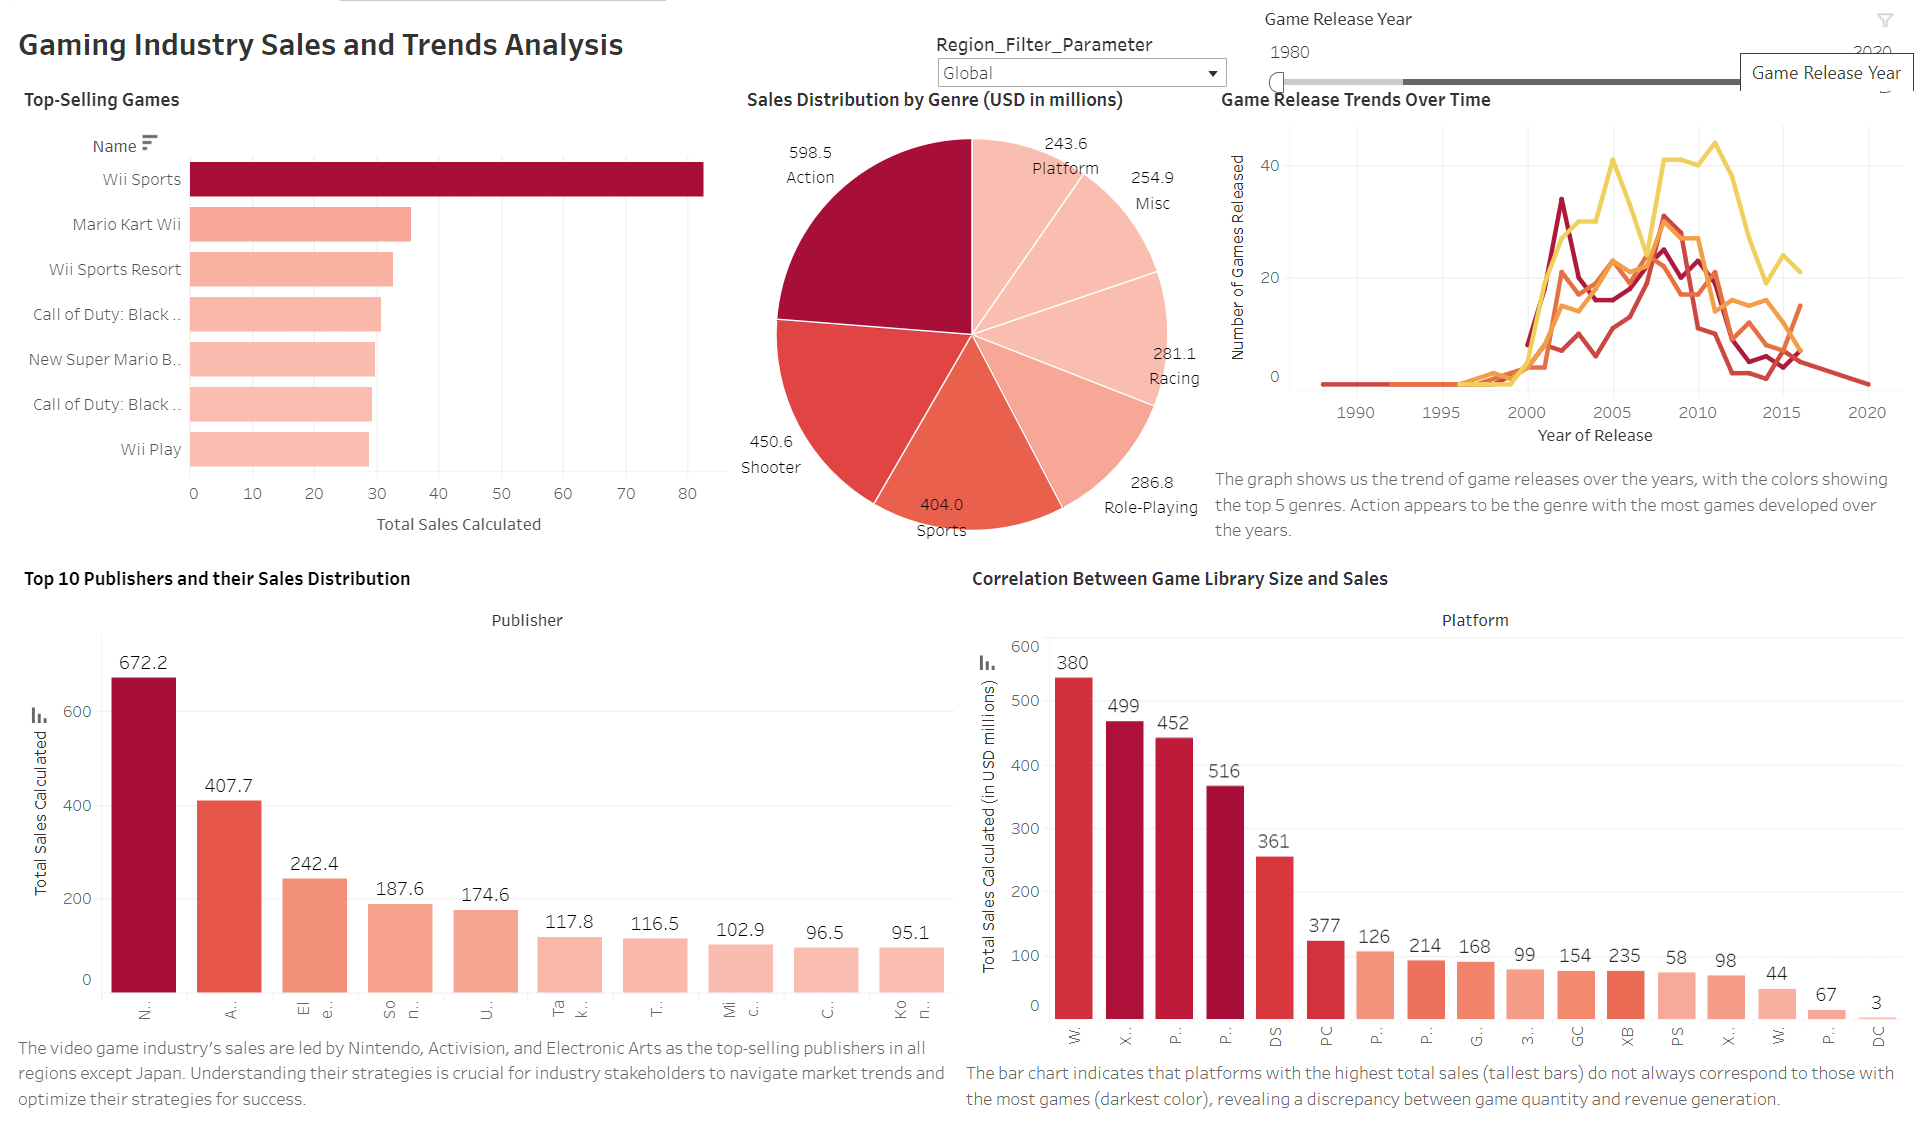

**Storyline 1**:

The "Gaming Industry Sales and Trends Analysis" dashboard encapsulates the video game sector's landscape, dominated by flagship titles and leading publishers, with "Wii Sports" topping sales charts due to smart bundling tactics. Nintendo, Activision, and Electronic Arts emerge as industry titans, underscoring the clout a handful of companies wield. The genre analysis reveals a consumer preference for action and shooters, reflecting a desire for immersive and high-energy gameplay. Despite a diverse array of offerings, the data points to quality over quantity, with top-selling platforms not necessarily those with the most titles, emphasizing the strategic importance of blockbuster franchises and the need for publishers to focus on high-demand, engaging content.

###Dashboard 2: Developer Influence and Regional Market Dynamics

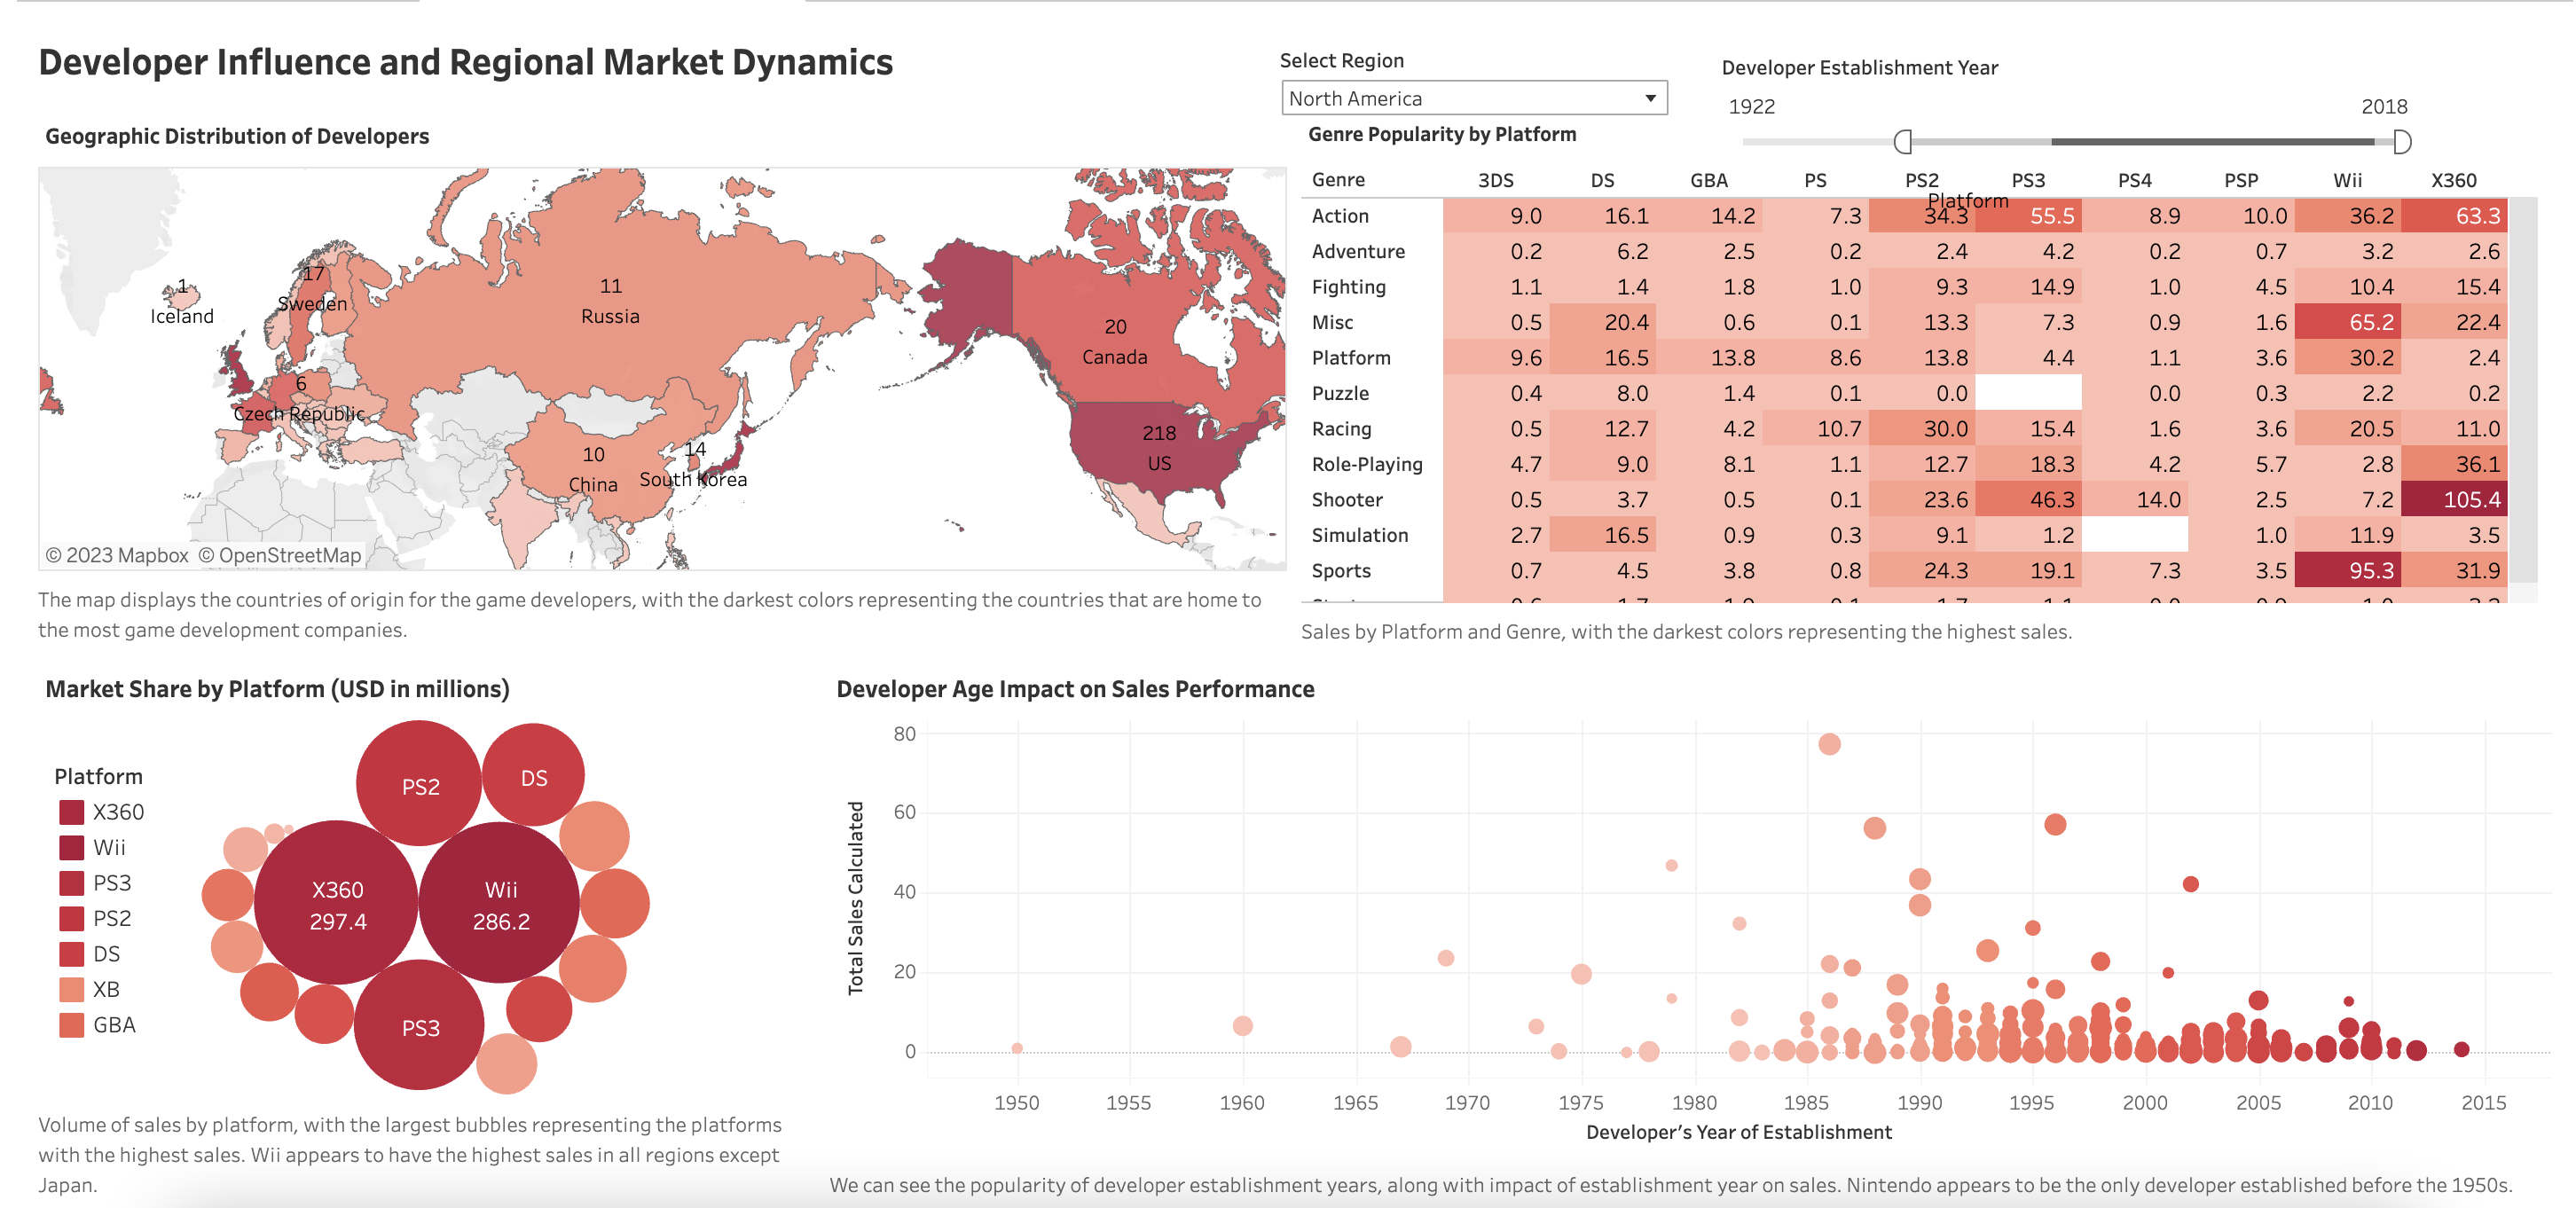

**Storyline 2**:

The "Developer Influence and Regional Market Dynamics" dashboard paints a global picture of the gaming industry's fabric, where the U.S. and Japan emerge as powerhouses with a dense concentration of game developers. The genre popularity matrix reveals that certain platforms have become synonymous with specific genres, such as the PS2 and Xbox 360 with Action and Shooter games, indicating targeted market strategies. The bubble chart contrasts the widespread appeal of the Wii against the formidable sales of the PS3 and Xbox 360, suggesting varied consumer preferences across platforms. Meanwhile, the timeline of developer establishment and its impact on sales suggests that heritage brands like Nintendo have a historical advantage, yet newer entrants are also making significant inroads, hinting at an industry that respects legacy but also rewards innovation. This dynamic interplay between age-old industry pillars and emerging creators defines the evolving landscape of game development and market success.

## Conclusion

The analysis of the video game industry reveals several key findings that illuminate its intricate dynamics. Game developers, their backgrounds, and the years they started out play a huge role in how games perform globally. It's clear that understanding where developers come from and their timelines is key to predicting how a game will do in the market.

The success dance in the gaming industry is tightly connected to gaming platforms, popularity, and tech advancements. Big-name publishers have a hefty influence, but the rise of new players shows that there is room for fresh ideas.

There is a correlation between the geographic location and establishment year of developers and global game sales. Developers from regions with a deep gaming history, for example Japan, exhibit significant success, underscoring the impact of cultural nuances on sales performance. Different parts of the world have different gaming tastes. Western markets are all about action, while Japan enjoys a more varied menu of game genres.

Through the trends we saw we found potential investment opportunities. The Nintendo Wii, especially in the sports genre, stands out globally, signaling a potential hotspot for unique gaming experiences that attract diverse audiences. Shooter games on platforms like X360 and PS3, from companies like Activision and Microsoft Game Studios, show promising sales, hinting at investment opportunities in companies making popular shooter games.

For venture capitalists and investors, diving into game sales data can be a game-changer. It tells us which game genres and platforms are performing the best. Allocating resources to projects in line with these trends maximizes returns. Examining sales data across regions helps identify markets with high potential which is crucial for planning smart marketing strategies. Spreading investments across different genres, platforms, and developers helps ride out the ups and downs of the gaming industry. Nintendo, as a game developer, shines in multiple genres, suggesting that investing in developers with a diverse set of successful games might be a good move.

Platforms also play a critical role in determining sales success. Platform popularity and technological advancements, particularly the transition to newer generations, are key factors. Platforms leading in specific genres, such as action or sports, demonstrate higher sales, emphasizing the need for strategic alignment with evolving platform trends.

Steam sales figures highlight the dominance of platforms like PS2 and Xbox 360, contributing significantly to total market share. A positive correlation between game availability and sales is evident, emphasizing the importance of a diverse game selection. Genre-specific analysis showcases PlayStation 3 excelling in action games and the Wii's popularity in sports and miscellaneous genres. The top six platforms command a substantial 63% market share, underlining a significant sales gap between these leaders and others.

The role of publishers is also crucial, with established ones boasting a long history and a substantial game portfolio wielding significant influence. However, the emergence of new publishers with standout titles signals a potential shift in the industry landscape, showcasing the industry's receptiveness to innovation.

We were able to identify genres and gaming platforms that consistently demonstrated high global sales as well as other regional sales. Investing in developers or publishers focusing on these genres and platforms may present lucrative opportunities. Analyzing sales data across different regions to identify markets with high potential can tailor investments to regions with a growing gaming market which in turn can be strategically advantageous.

## Citations

####Most Popular Gaming Platform in 2023

https://pinglestudio.com/blog/industry-news/whats-the-most-popular-gaming-platform-in-2023

#### The Best Game Consoles

https://www.nytimes.com/wirecutter/reviews/best-game-consoles/

#### Video Game Genres

https://en.wikipedia.org/wiki/List_of_video_game_genres

#### Sixth Generation of Developer
https://apps.lib.umich.edu/online-exhibits/exhibits/show/cvga-disassembled/gamegen6

ChatGPT: We used AI to help us do some grammatic corrections and to help us condense our summaries.